In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/predictive_analytics_lockdown/full.csv')
print(df.shape)
print(df.isnull().sum())
df.head()

(90, 6)
date               0
sentiment_score    0
Confirmed          0
Active             0
Death              0
Recovered          0
dtype: int64


,date,sentiment_score,Confirmed,Active,Death,Recovered
0,01-02-2020,0.010094,0,0,0,0
1,02-02-2020,-0.214868,1,1,0,0
2,03-02-2020,-0.087546,1,1,0,0
3,04-02-2020,-0.039085,0,0,0,0
4,05-02-2020,-0.019009,0,0,0,0


In [6]:
df['sentiment_score']=df['sentiment_score'].shift(-2)

In [7]:
df.head()

,date,sentiment_score,Confirmed,Active,Death,Recovered
0,01-02-2020,-0.087546,0,0,0,0
1,02-02-2020,-0.039085,1,1,0,0
2,03-02-2020,-0.019009,1,1,0,0
3,04-02-2020,-0.133064,0,0,0,0
4,05-02-2020,-0.151224,0,0,0,0


In [8]:
df=df.dropna()

In [9]:
df1=df.iloc[:,[1,2,3,4,5]]

In [10]:
df1.shape

(88, 5)

In [11]:
corr=df1.corr()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                 sentiment_score  Confirmed    Active     Death  Recovered
sentiment_score         1.000000   0.619041  0.653017  0.608239   0.479781
Confirmed               0.619041   1.000000  0.984097  0.953126   0.927995
Active                  0.653017   0.984097  1.000000  0.929420   0.847276
Death                   0.608239   0.953126  0.929420  1.000000   0.893221
Recovered               0.479781   0.927995  0.847276  0.893221   1.000000


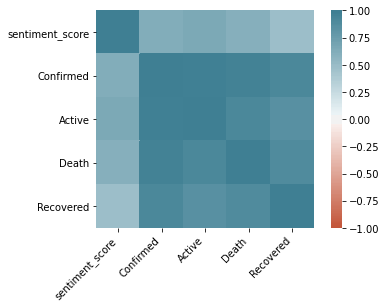

In [12]:
import seaborn as sns
print(corr)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

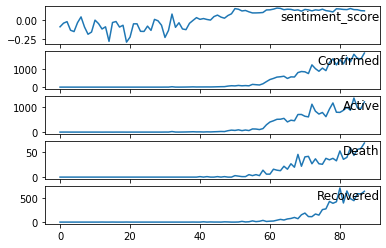

In [13]:
from matplotlib import pyplot
values = df1.values
groups = [0, 1, 2,3,4]
i = 1
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df1.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.iloc[:,[1,2,3,4]], df1.iloc[:,[0]], test_size = 0.25, random_state = 42)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(66, 4)
(66, 1)
(22, 4)
(22, 1)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
x_train=scaler.fit_transform(x_train)

In [18]:
len(x_train)

66

In [19]:
x_test=scaler.transform(x_test)
x_test

array([[ 1.18326107,  1.07934443,  1.68045033,  1.24265812],
       [-0.59998234, -0.63845664, -0.57453599, -0.45730498],
       [-0.59998234, -0.63845664, -0.57453599, -0.45730498],
       [-0.59998234, -0.63845664, -0.57453599, -0.45730498],
       [-0.59998234, -0.6412681 , -0.57453599, -0.45107801],
       [ 0.49278612,  0.62388817,  0.61229892,  0.14048424],
       [-0.59998234, -0.63845664, -0.57453599, -0.45730498],
       [-0.59998234, -0.63845664, -0.57453599, -0.45730498],
       [-0.59998234, -0.63845664, -0.57453599, -0.45730498],
       [ 0.97244379,  1.32112985,  2.15518429, -0.02141701],
       [ 2.50812195,  2.07741215,  2.74860174,  3.18547309],
       [ 0.33612374,  0.49456109,  0.37493194, -0.05255186],
       [-0.43364944, -0.40791705, -0.51519424, -0.43862407],
       [ 2.37273471,  1.55729235,  2.57057651,  3.92025568],
       [ 2.94909755,  3.1542007 ,  2.0365008 ,  2.29501623],
       [ 0.57788668,  0.89097672,  0.73098241, -0.18954523],
       [-0.59611414, -0.

In [20]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [21]:
from sklearn.svm import SVR
svr=SVR(C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
y_tr=svr.predict(x_train)
print('mae test:',metrics.mean_absolute_error(y_test,y_pred))
print('mse test:',metrics.mean_squared_error(y_test,y_pred))
print('rmse test:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 test:',r2_score(y_pred,y_test))
print('mae train:',metrics.mean_absolute_error(y_train,y_tr))
print('mse train:',metrics.mean_squared_error(y_train,y_tr))
print('rmse train:',np.sqrt(metrics.mean_squared_error(y_train,y_tr)))
print('r2 train:',r2_score(y_train,y_tr))

mae test: 0.10707727229542416
mse test: 0.01595749800712377
rmse test: 0.1263229908097642
r2 test: -7.450933996282592
mae train: 0.10821073671107163
mse train: 0.014842473441299778
rmse train: 0.1218296903111051
r2 train: -0.0925072982659696


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
grad=GradientBoostingRegressor(n_estimators=200,random_state=100,learning_rate=0.1,max_depth = 10,min_samples_leaf =3,min_samples_split = 12)
grad.fit(x_train,y_train)
y_pred=grad.predict(x_test)
y_tr=grad.predict(x_train)
print('mae test:',metrics.mean_absolute_error(y_test,y_pred))
print('mse test:',metrics.mean_squared_error(y_test,y_pred))
print('rmse test:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 test:',r2_score(y_pred,y_test))
print('mae train:',metrics.mean_absolute_error(y_train,y_tr))
print('mse train:',metrics.mean_squared_error(y_train,y_tr))
print('rmse train:',np.sqrt(metrics.mean_squared_error(y_train,y_tr)))
print('r2 train:',r2_score(y_train,y_tr))

mae test: 0.03070314537516329
mse test: 0.0024520058166942736
rmse test: 0.0495177323460422
r2 test: 0.8220067395629632
mae train: 0.025661806226299093
mse train: 0.0025103330300198525
rmse train: 0.05010322374877541
r2 train: 0.8152223638990292


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


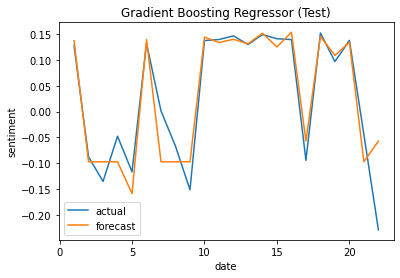

In [23]:
import matplotlib.pyplot as plt
x1=range(1,23)
y1 = y_test
plt.plot(x1, y1, label = "actual")
x2 = range(1,23)
y2 = y_pred
plt.plot(x2, y2, label = "forecast")
plt.xlabel('date')
plt.ylabel('sentiment')
plt.title('Gradient Boosting Regressor (Test)')
plt.legend()
plt.show()

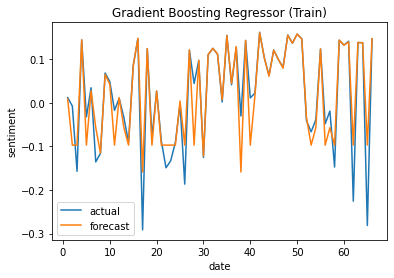

In [24]:
import matplotlib.pyplot as plt
x1=range(1,67)
y1 = y_train
plt.plot(x1, y1, label = "actual")

x2 = range(1,67)
y2 = y_tr
plt.plot(x2, y2, label = "forecast")
plt.xlabel('date')

plt.ylabel('sentiment')
plt.title('Gradient Boosting Regressor (Train)')
plt.legend()
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators= 100,min_samples_split=12,min_samples_leaf=3,max_features=2,max_depth=8,bootstrap=True)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_tr=rf.predict(x_train)
print('mae test:',metrics.mean_absolute_error(y_test,y_pred))
print('mse test:',metrics.mean_squared_error(y_test,y_pred))
print('rmse test:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 test:',r2_score(y_pred,y_test))
print('mae train:',metrics.mean_absolute_error(y_train,y_tr))
print('mse train:',metrics.mean_squared_error(y_train,y_tr))
print('rmse train:',np.sqrt(metrics.mean_squared_error(y_train,y_tr)))
print('r2 train:',r2_score(y_train,y_tr))

mae test: 0.03026211829497177
mse test: 0.0022029524626914596
rmse test: 0.04693562040381974
r2 test: 0.8268715538293306
mae train: 0.03581950692329038
mse train: 0.002991762518654936
rmse train: 0.054697006487146406
r2 train: 0.779785869300308


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestRegressor(max_features=0.25)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)


In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 200}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0,max_depth=1,min_samples_split= 10,min_samples_leaf=3)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
y_tr=regressor.predict(x_train)
print('mae test:',metrics.mean_absolute_error(y_test,y_pred))
print('mse test:',metrics.mean_squared_error(y_test,y_pred))
print('rmse test:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 test:',r2_score(y_pred,y_test))
print('mae train:',metrics.mean_absolute_error(y_train,y_tr))
print('mse train:',metrics.mean_squared_error(y_train,y_tr))
print('rmse train:',np.sqrt(metrics.mean_squared_error(y_train,y_tr)))
print('r2 train:',r2_score(y_train,y_tr))

mae test: 0.03642463011112967
mse test: 0.002271481229599163
rmse test: 0.04766005905996302
r2 test: 0.7502510191060578
mae train: 0.0506038401536876
mse train: 0.0044232694462205
rmse train: 0.06650766456748049
r2 train: 0.6744171939195611


In [ ]:
from xgboost.sklearn import XGBRegressor
XGBModel = XGBRegressor(max_depth=12,gamma=0.1)
XGBModel.fit(x_train,y_train)
y_pred=XGBModel.predict(x_test)
y_tr=XGBModel.predict(x_train)
print('mae test:',metrics.mean_absolute_error(y_test,y_pred))
print('mse test:',metrics.mean_squared_error(y_test,y_pred))
print('rmse test:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 test:',r2_score(y_pred,y_test))
print('mae train:',metrics.mean_absolute_error(y_train,y_tr))
print('mse train:',metrics.mean_squared_error(y_train,y_tr))
print('rmse train:',np.sqrt(metrics.mean_squared_error(y_train,y_tr)))
print('r2 train:',r2_score(y_train,y_tr))

[11:42:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mae test: 0.0534562061456382
mse test: 0.004095846109377261
rmse test: 0.06399879771821702
r2 test: 0.13770629840906212
mae train: 0.05035349451232402
mse train: 0.0046213191888656085
rmse train: 0.06798028529555909
r2 train: 0.6598393817971275
